 # Important Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, precision_score, recall_score, f1_score

# Importing data 

In [2]:
data = pd.read_csv(r'C:\Users\njhar\Downloads\train_FD001.txt', sep=" ")

In [3]:
data

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [4]:
# Initail dropping., because columns full of null values

data.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)

naming the columns with exact attributes 1) 'unit_ID' : unit number 2) 'cycles': time, in cycles 3) 'setting_1' : operational setting 1 4) 'setting_2' : operational setting 2 5) 'setting_3' : operational setting 3 6) 'T2' : Total temperature at fan inlet ((°R)(Rankine scale)) 7) 'T24' : Total temperature at LPC outlet 8) 'T30' : Total temperature at HPC outlet 9) 'T50' : Total temperature at LPT outlet 10)'P2' : Pressure at fan inlet ((psia)(pounds per square inch absolute)) 11)'P15' : Total pressure in bypass-duct (psia) 12)'P30' : Total pressure at HPC outlet (psia) 13)'Nf' : Pysical fan speed (rpm) 14)'Nc' : Pysical core speed (rpm) 15)'epr' : Engine Pressure ratio (P50/P2) 16)'Ps30' : Static pressure at HPC outlet (psia) 17)'phi' : Ratio of fuel flow ((pps/psi)( pulse number (number of steps) per second)(Pounds per Square Inch. it measures how many pounds of pressure (force) are in an area)) 18)'NRf' : Corrected fan speed (rpm) 19)'NRc' : Corrected core speed (rpm) 20)'BPR' : Bypass Ratio 21)'farB' : Burner fuel-air ratio 22)'htBleed' : Bleed Enthalpy 23)'Nf_dmd' : Demanded fan speed (rpm) 24)'PCRfR_dmd' : Demanded corrected fan speed (rpm) 25)'W31' : HPT coolant bleed (ibm/s) 26)'W32' : LPT coolant bleed (ibm/s)

# Giving names to the features 

In [5]:
index_names = ['engine', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
col_names = index_names + setting_names + sensor_names

In [6]:
data.columns = col_names

In [7]:
data

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20625,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20626,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20627,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20628,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


# Basic Statistics

In [8]:
data.describe()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),...,(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.0,2.063000e+04,20630.000000,20630.000000,20630.000000,2.063000e+04,...,20630.000000,20630.000000,20630.000000,20630.000000,2.063000e+04,20630.000000,20630.0,20630.0,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,100.0,5.186700e+02,642.680975,1590.523159,1408.934186,1.462000e+01,...,521.413458,2388.096156,8143.752971,8.442147,3.000000e-02,393.210713,2388.0,100.0,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.0,6.537152e-11,0.500029,6.131295,9.000636,3.394700e-12,...,0.737569,0.071919,19.076605,0.037506,1.556432e-14,1.548778,0.0,0.0,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.242500,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438950,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.557500,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


# Understanding the data

In [9]:
data.shape

(20630, 26)

In [10]:
data.dtypes

engine                                       int64
cycle                                        int64
setting_1                                  float64
setting_2                                  float64
setting_3                                  float64
(Fan inlet temperature) (◦R)               float64
(LPC outlet temperature) (◦R)              float64
(HPC outlet temperature) (◦R)              float64
(LPT outlet temperature) (◦R)              float64
(Fan inlet Pressure) (psia)                float64
(bypass-duct pressure) (psia)              float64
(HPC outlet pressure) (psia)               float64
(Physical fan speed) (rpm)                 float64
(Physical core speed) (rpm)                float64
(Engine pressure ratio(P50/P2)             float64
(HPC outlet Static pressure) (psia)        float64
(Ratio of fuel flow to Ps30) (pps/psia)    float64
(Corrected fan speed) (rpm)                float64
(Corrected core speed) (rpm)               float64
(Bypass Ratio)                 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   engine                                   20630 non-null  int64  
 1   cycle                                    20630 non-null  int64  
 2   setting_1                                20630 non-null  float64
 3   setting_2                                20630 non-null  float64
 4   setting_3                                20630 non-null  float64
 5   (Fan inlet temperature) (◦R)             20630 non-null  float64
 6   (LPC outlet temperature) (◦R)            20630 non-null  float64
 7   (HPC outlet temperature) (◦R)            20630 non-null  float64
 8   (LPT outlet temperature) (◦R)            20630 non-null  float64
 9   (Fan inlet Pressure) (psia)              20630 non-null  float64
 10  (bypass-duct pressure) (psia)            20630

In [12]:
data.isnull().sum()

engine                                     0
cycle                                      0
setting_1                                  0
setting_2                                  0
setting_3                                  0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [13]:
data.nunique()

engine                                      100
cycle                                       362
setting_1                                   158
setting_2                                    13
setting_3                                     1
(Fan inlet temperature) (◦R)                  1
(LPC outlet temperature) (◦R)               310
(HPC outlet temperature) (◦R)              3012
(LPT outlet temperature) (◦R)              4051
(Fan inlet Pressure) (psia)                   1
(bypass-duct pressure) (psia)                 2
(HPC outlet pressure) (psia)                513
(Physical fan speed) (rpm)                   53
(Physical core speed) (rpm)                6403
(Engine pressure ratio(P50/P2)                1
(HPC outlet Static pressure) (psia)         159
(Ratio of fuel flow to Ps30) (pps/psia)     427
(Corrected fan speed) (rpm)                  56
(Corrected core speed) (rpm)               6078
(Bypass Ratio)                             1918
(Burner fuel-air ratio)                 

# Sensor Exploration

C:\Users\njhar\AppData\Local\Temp\ipykernel_15436\2413581168.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))


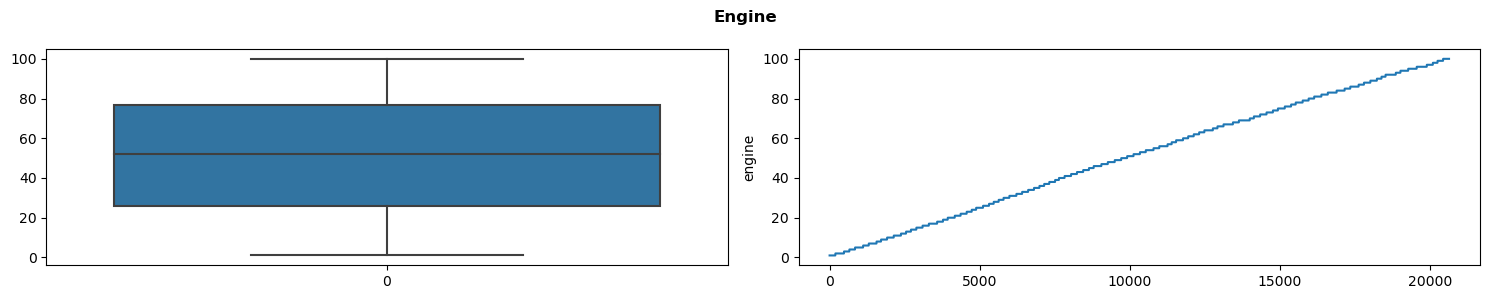

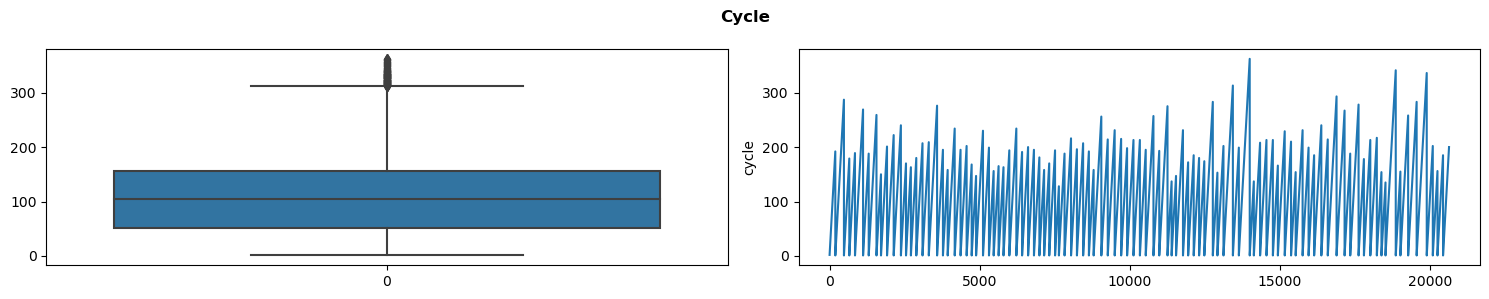

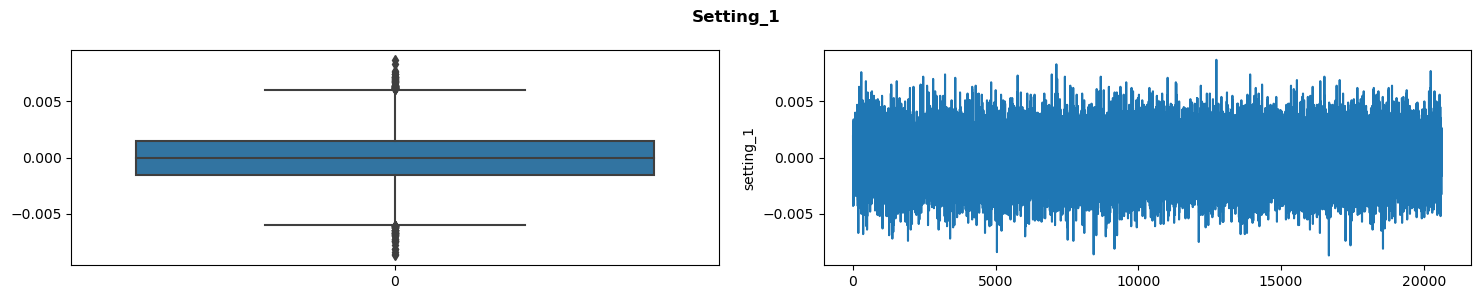

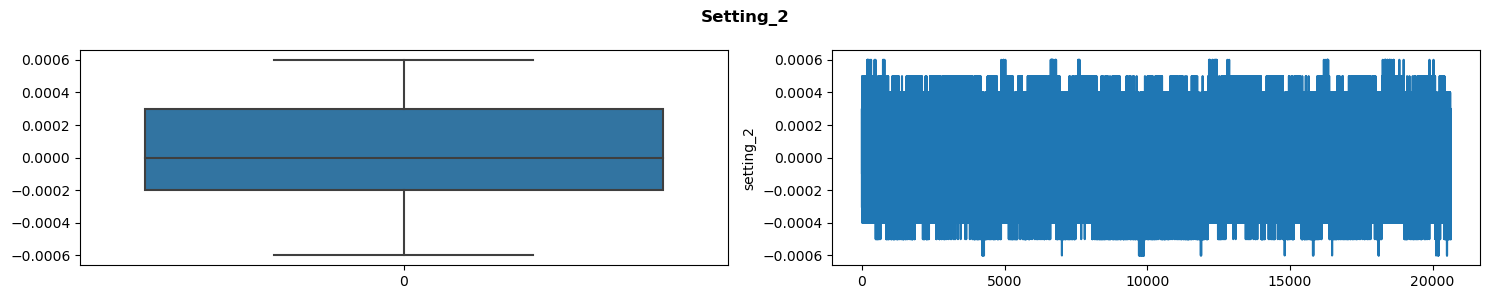

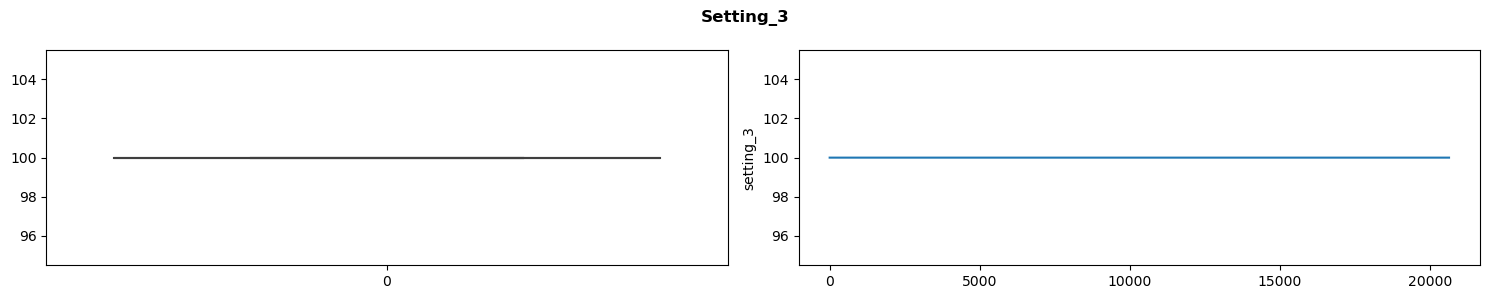

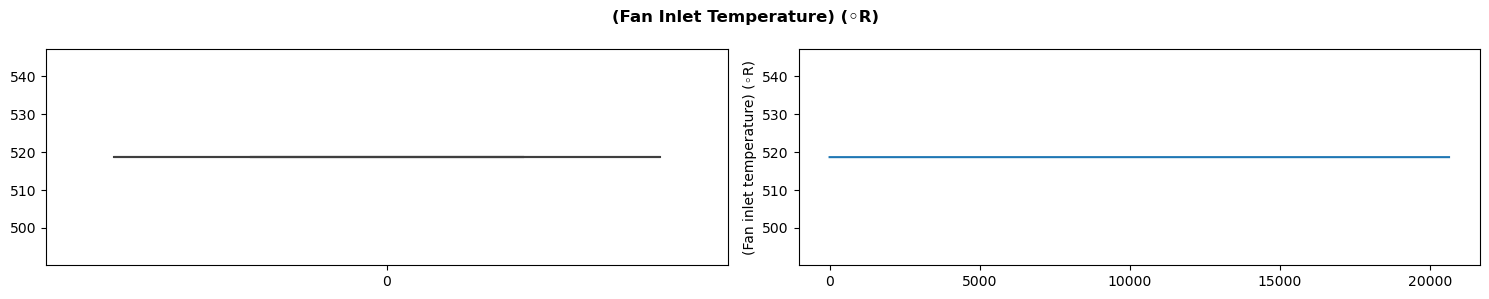

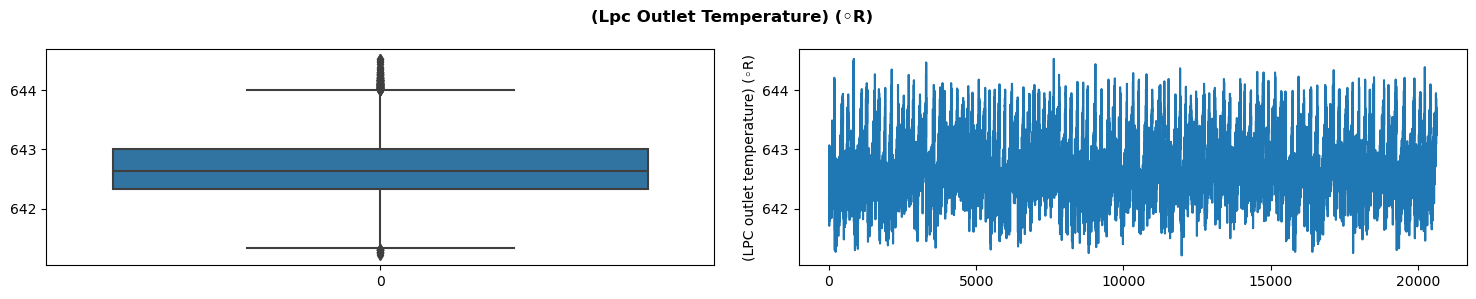

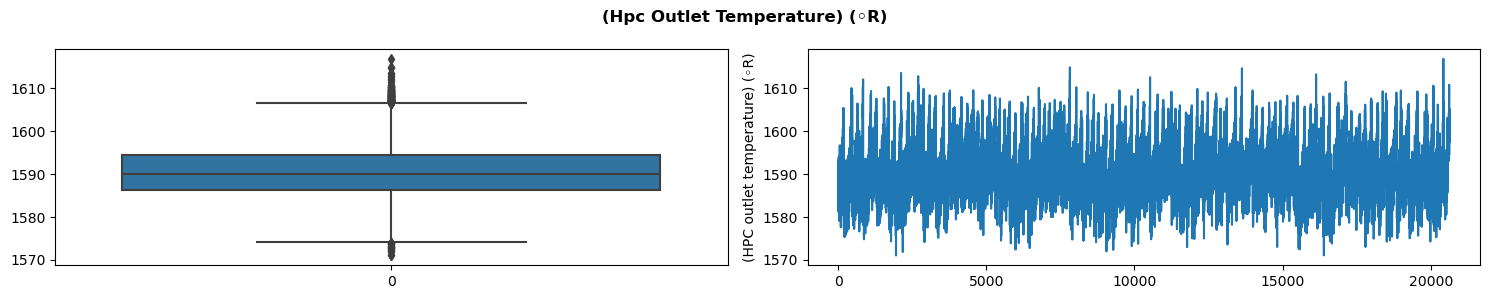

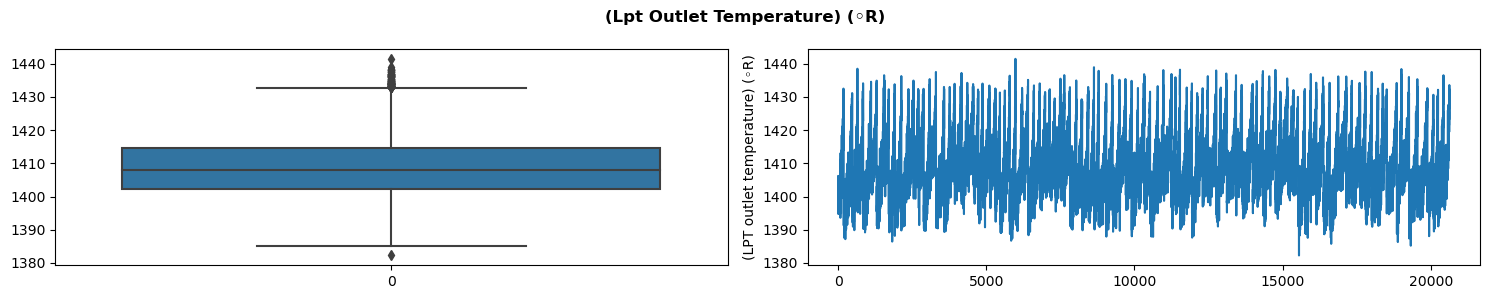

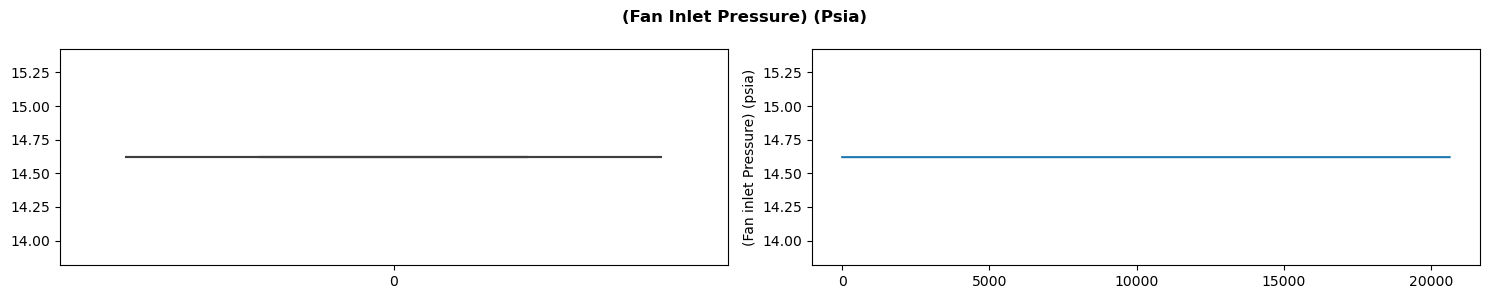

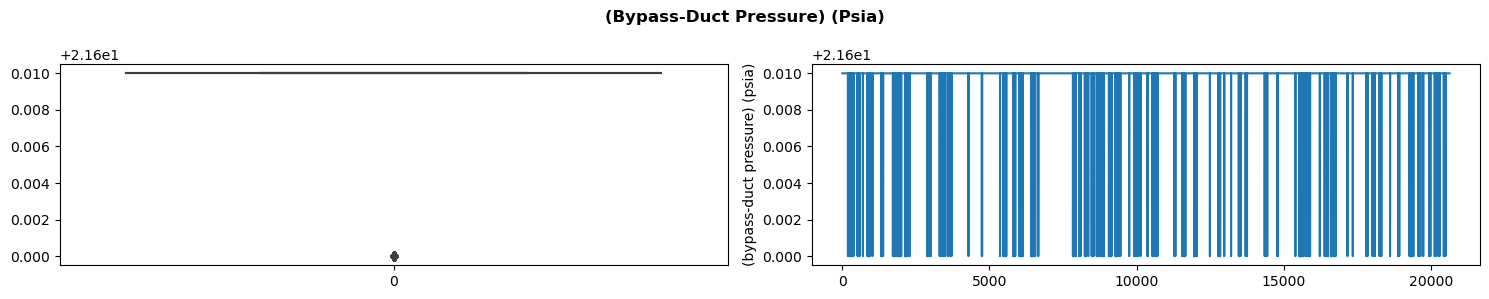

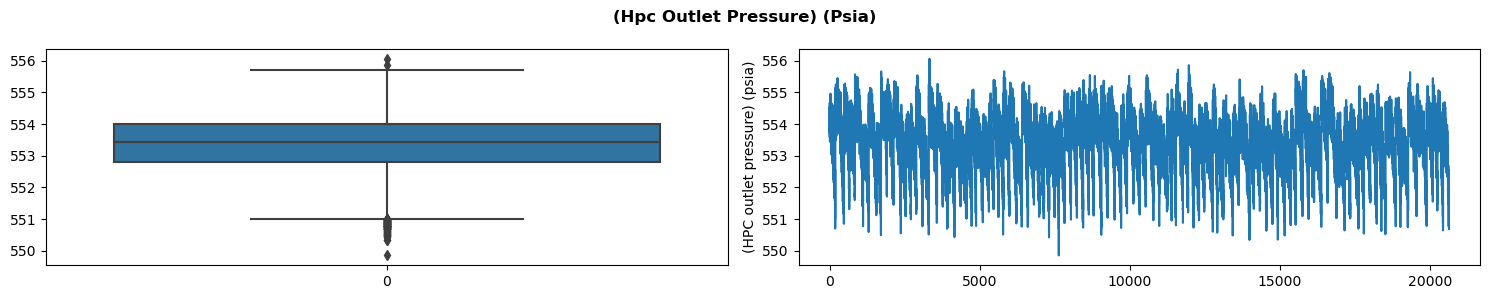

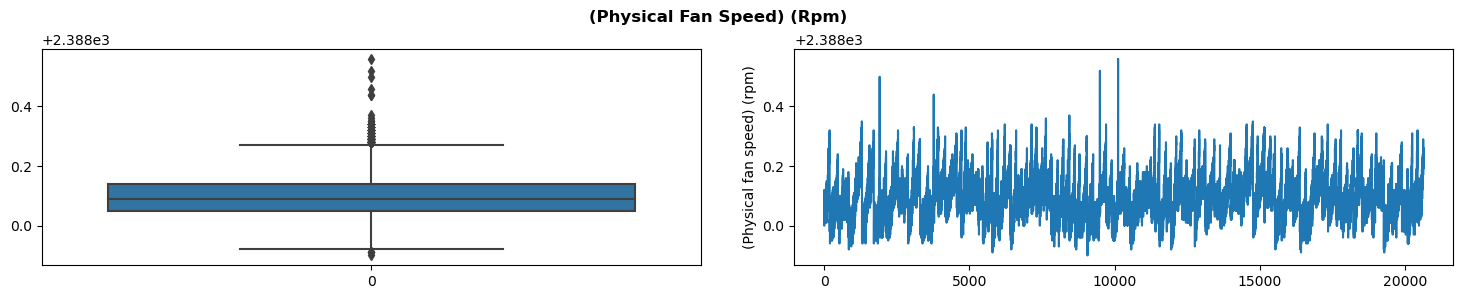

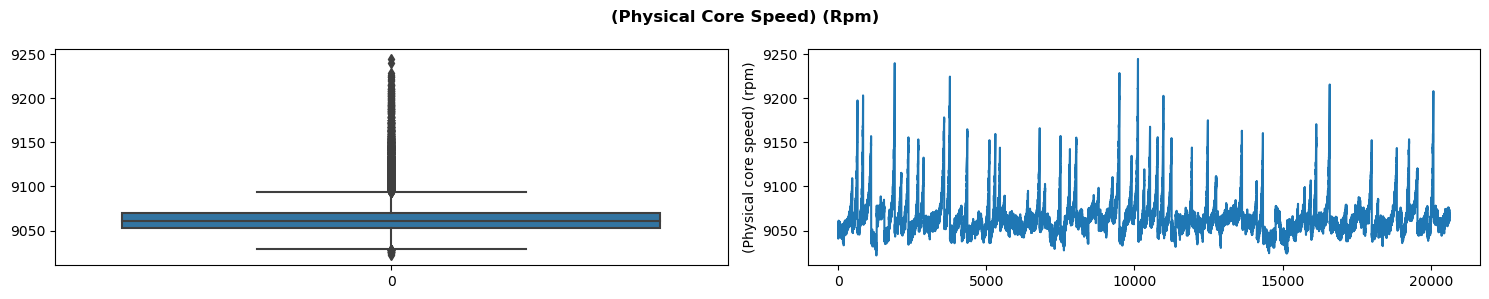

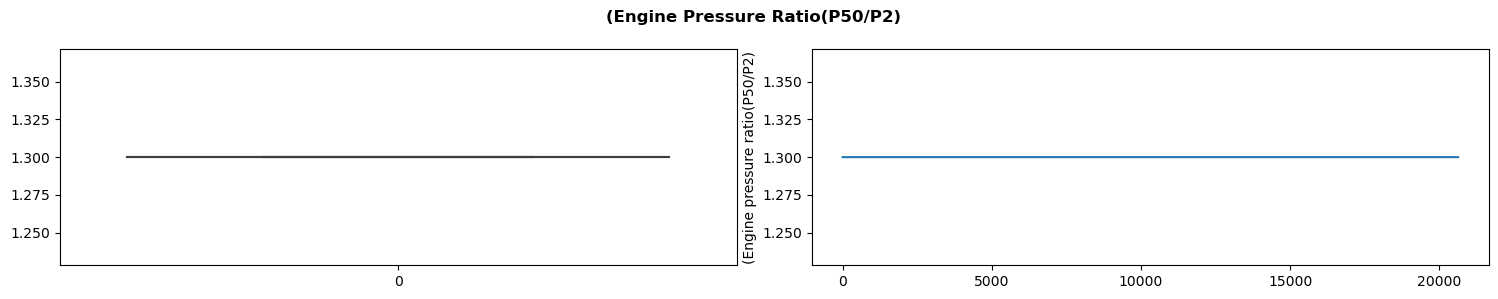

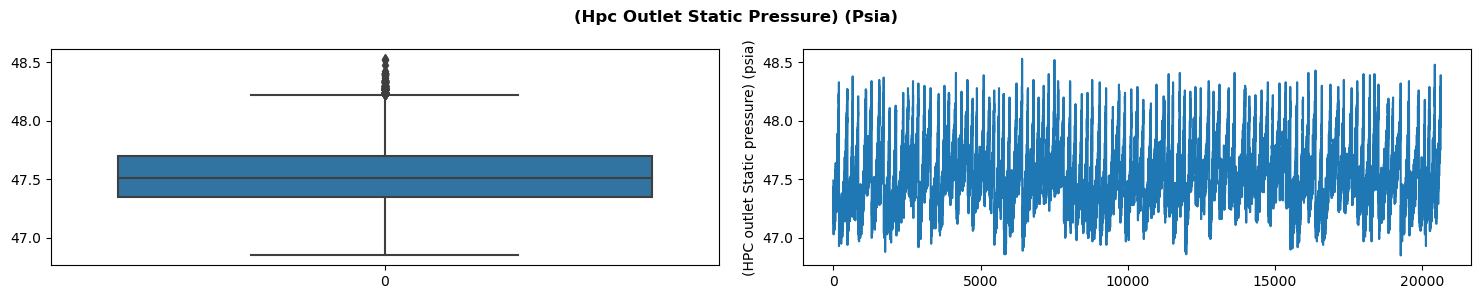

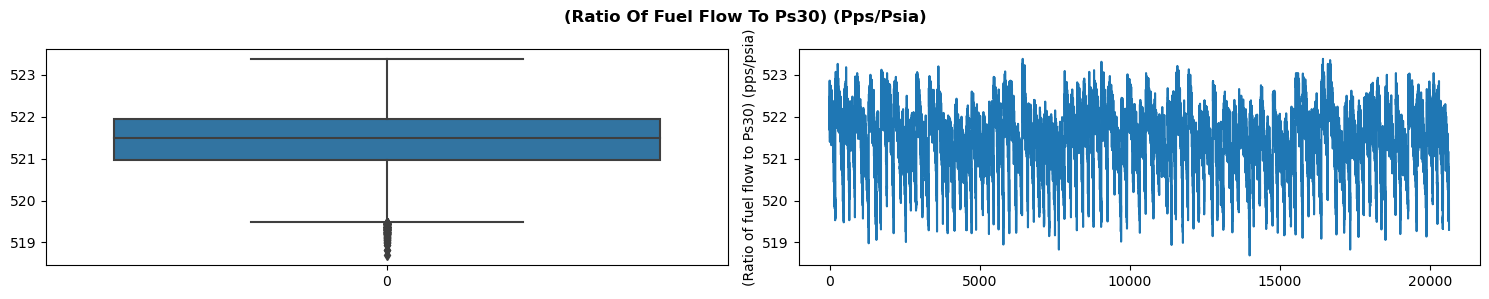

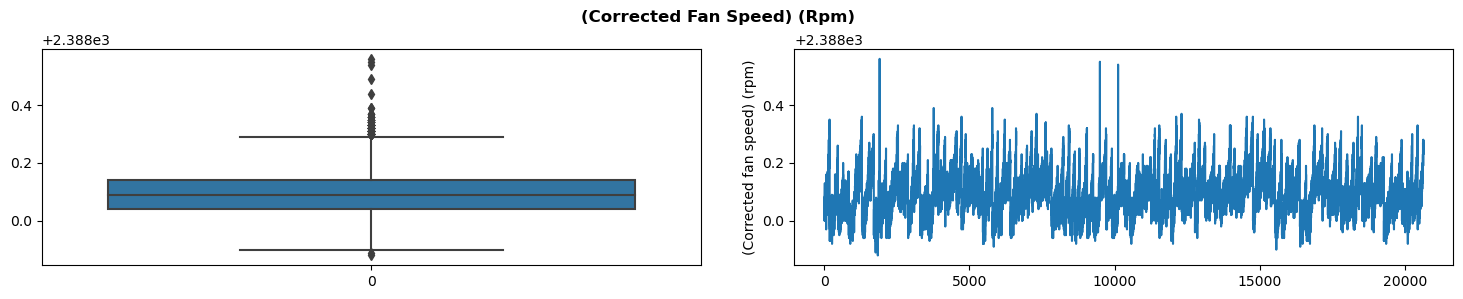

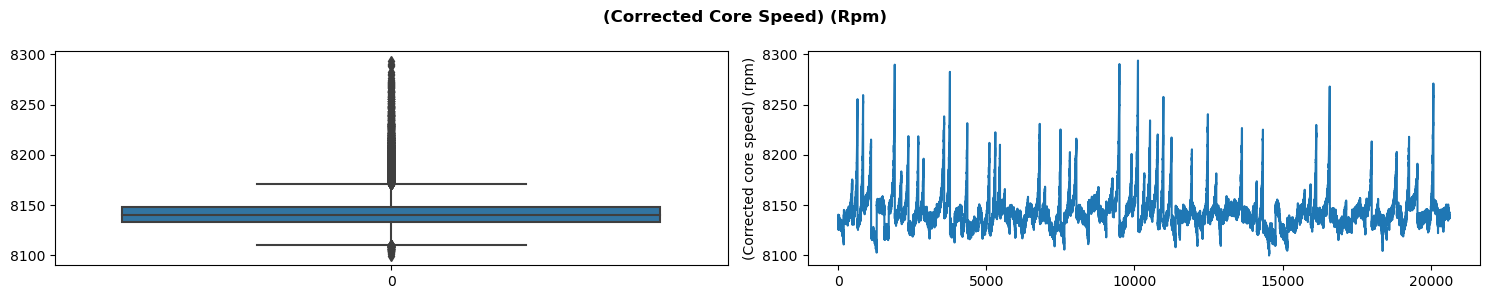

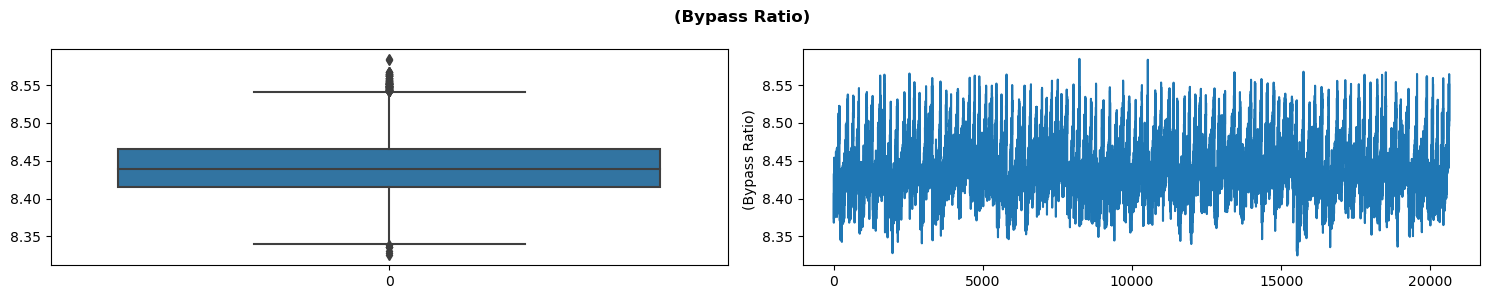

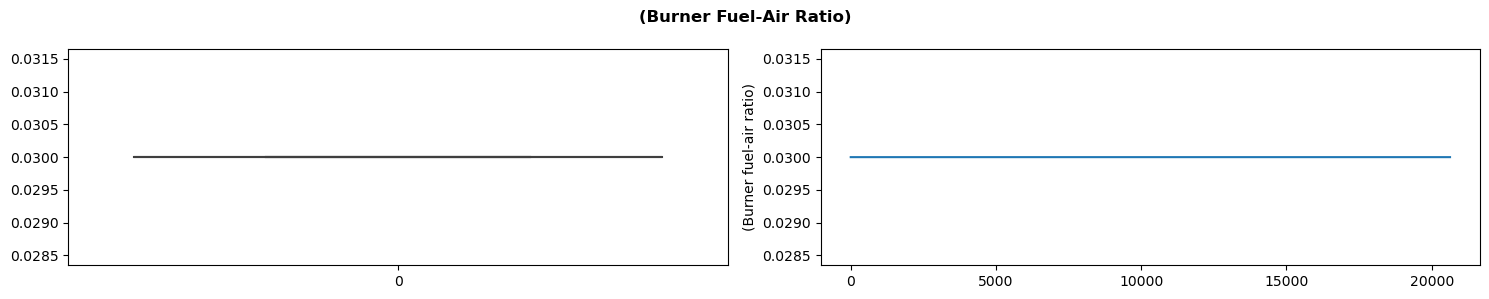

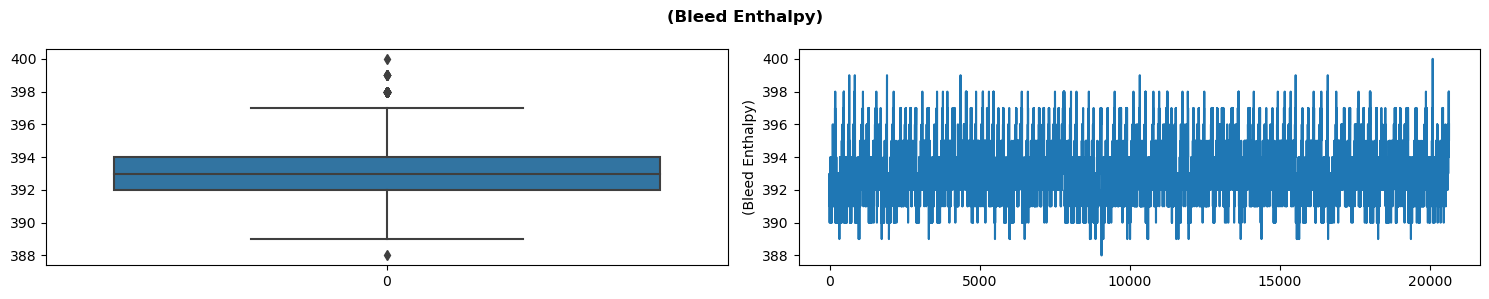

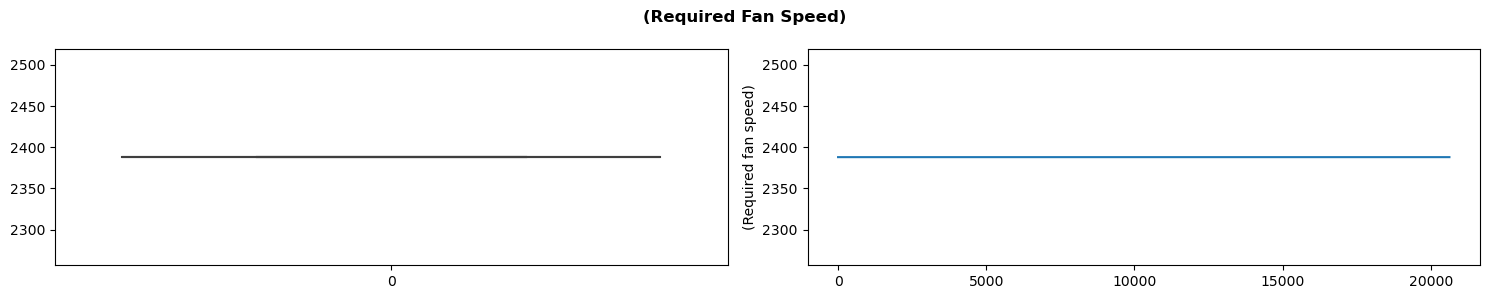

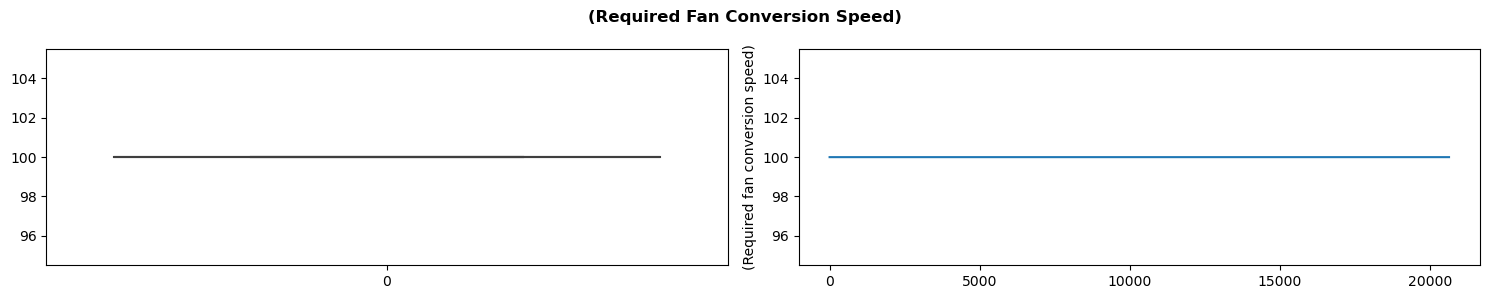

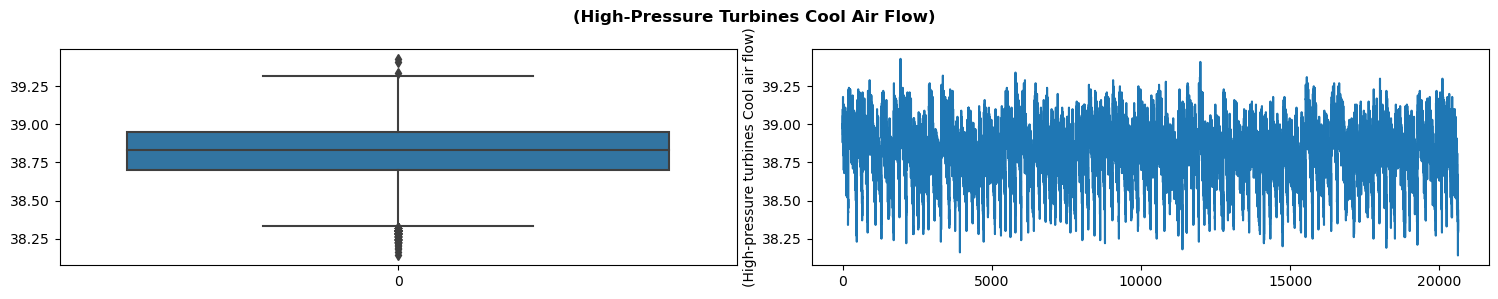

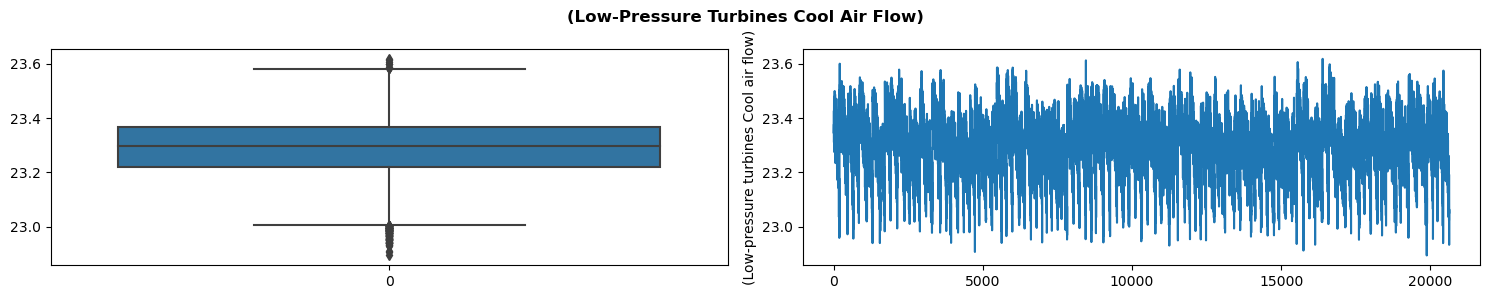

In [14]:
for col in data.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.boxplot(data[col], ax = ax[0])
    sns.lineplot(data[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

# Dropping Unwanted Sensors

'setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)'

The above mentioned sensors all are having only constant values.....

In [15]:
unwanted=[]
for i in data.select_dtypes(include=np.number):
    if data[i].nunique()==1:
        unwanted.append(i)
print(unwanted)

['setting_3', '(Fan inlet temperature) (◦R)', '(Fan inlet Pressure) (psia)', '(Engine pressure ratio(P50/P2)', '(Burner fuel-air ratio)', '(Required fan speed)', '(Required fan conversion speed)']


In [16]:
unwanted

['setting_3',
 '(Fan inlet temperature) (◦R)',
 '(Fan inlet Pressure) (psia)',
 '(Engine pressure ratio(P50/P2)',
 '(Burner fuel-air ratio)',
 '(Required fan speed)',
 '(Required fan conversion speed)']

In [17]:
#so we will drop such columns
data.drop(columns=unwanted, inplace=True)

In [18]:
data.shape

(20630, 19)

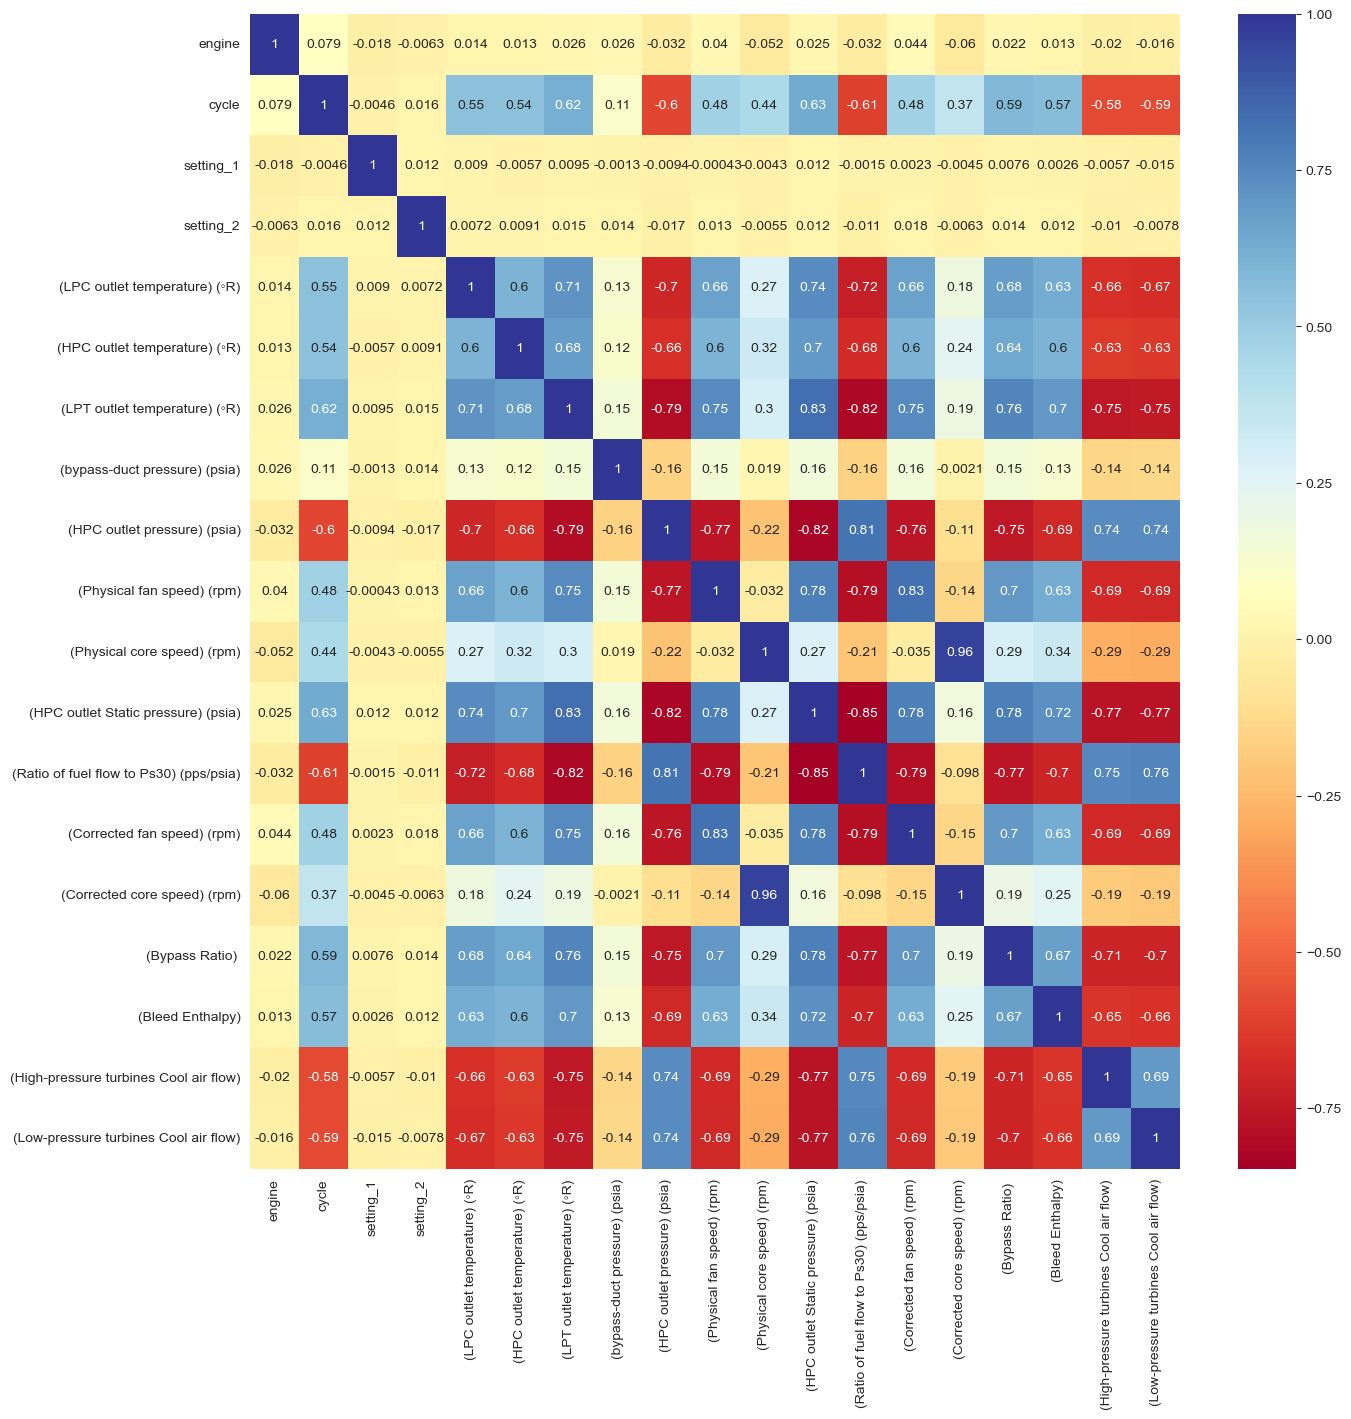

In [19]:
# we will check for correlation
plt.figure(figsize=(15,15))
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = data.corr()
plot_kws={"s": 1}
sns.heatmap(data.corr(),
            cmap='RdYlBu',
            annot=True,
            linecolor='lightgrey').set_facecolor('white')

In [20]:
list(data)

['engine',
 'cycle',
 'setting_1',
 'setting_2',
 '(LPC outlet temperature) (◦R)',
 '(HPC outlet temperature) (◦R)',
 '(LPT outlet temperature) (◦R)',
 '(bypass-duct pressure) (psia)',
 '(HPC outlet pressure) (psia)',
 '(Physical fan speed) (rpm)',
 '(Physical core speed) (rpm)',
 '(HPC outlet Static pressure) (psia)',
 '(Ratio of fuel flow to Ps30) (pps/psia)',
 '(Corrected fan speed) (rpm)',
 '(Corrected core speed) (rpm)',
 '(Bypass Ratio) ',
 '(Bleed Enthalpy)',
 '(High-pressure turbines Cool air flow)',
 '(Low-pressure turbines Cool air flow)']

# Outlier Detection

In [21]:
# Removing outliers using (Z-score)
from scipy import stats
" z > 3 (Thershold) ---- this is an outlier"
z = np.abs(stats.zscore(data))
print(z)

         engine     cycle  setting_1  setting_2  \
0      1.728251  1.550782   0.872688   1.031809   
1      1.728251  1.536264   1.961847   1.015632   
2      1.728251  1.521745   0.324068   0.008089   
3      1.728251  1.507226   0.864608   0.690569   
4      1.728251  1.492708   1.961847   0.349329   
...         ...       ...        ...        ...   
20625  1.659200  1.265837   0.178833   1.031809   
20626  1.659200  1.280355   0.727453   1.714289   
20627  1.659200  1.294874   0.186913   0.008089   
20628  1.659200  1.309393   0.498861   1.015632   
20629  1.659200  1.323911   1.458945   1.714289   

       (LPC outlet temperature) (◦R)  (HPC outlet temperature) (◦R)  \
0                           1.061914                       0.211517   
1                           0.661928                       0.413162   
2                           0.661928                       1.261291   
3                           0.621929                       1.251505   
4                           1.16

In [22]:
# printing the outliers values

print(np.where(z>3)) 

(array([  180,   186,   186, ..., 20627, 20628, 20628], dtype=int64), array([ 4,  2,  9, ..., 18,  8, 11], dtype=int64))


In [23]:
# Removing the outlier values

new_data = data[(z < 3).all(axis = 1)] # creating dataset without outliers

In [24]:
new_data.shape

(19218, 19)

# Finding Remaining Useful Life ( RUL )

Define the maximum life of each engine, as this could be used to obtain the RUL at each point in time of the engine's life remaining useful life (RUL) of each engine in the test dataset.
RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

In [25]:
new_data['cycle'].max()

315

The RUL prediction is only useful nearer to the end of the engine's life, therefore we put an upper limit on the RUL this is a bit sneaky, since it supposes that the test set has RULs of less than this value, the closer you are to the true value, the more accurate the model will be

In [26]:
data_train_RUL = new_data.groupby(['engine']).agg({'cycle':'max'})
data_train_RUL.rename(columns={'cycle':'life'},inplace=True)
data_train_RUL.head()

,life
engine,
1,191
2,286
3,159
4,168
5,253


In [27]:
data_train = new_data.merge(data_train_RUL,how='left',on=['engine'])

In [28]:
data_train['RUL'] = data_train['life'] - data_train['cycle']
data_train.drop(['life'],axis=1,inplace=True)
data_train['RUL'][data_train['RUL']>125]=125
data_train.head()

C:\Users\njhar\AppData\Local\Temp\ipykernel_15436\2474511239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['RUL'][data_train['RUL']>125]=125


,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,125
1,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,125
2,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,125
3,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,125
4,1,6,-0.0043,-0.0001,642.10,1584.47,1398.37,21.61,554.67,2388.02,9049.68,47.16,521.68,2388.03,8132.85,8.4108,391,38.98,23.3669,125


# train and test data spliting

In [29]:
x = data_train.iloc[:, :-1]
y = data_train.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  Data Scaling using MinMaxScale

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (15374, 19)
x_test shape :  (3844, 19)
y_train shape :  (15374,)
y_test shape :  (3844,)


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
# make predictions on the testing data
y_pred = model.predict(x_test)

In [35]:
# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")
print(f"mean_absolute_percentage_error: {mape}")

Mean squared error: 427.00209678296653
Root mean squared error: 20.6640290549294
R-squared score: 0.7433122340929279
mean_absolute_percentage_error: 318447395607273.56


In [36]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  LinearRegression() Has a training score of 75.0 % accuracy score


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 427.00209678296653
Root mean squared error: 20.6640290549294
R-squared score: 0.7433122340929279


In [39]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  RandomForestRegressor() Has a training score of 89.0 % accuracy score


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 427.00209678296653
Root mean squared error: 20.6640290549294
R-squared score: 0.7433122340929279


In [42]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  DecisionTreeRegressor() Has a training score of 78.0 % accuracy score


# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 427.00209678296653
Root mean squared error: 20.6640290549294
R-squared score: 0.7433122340929279


In [45]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  KNeighborsRegressor() Has a training score of 81.0 % accuracy score


# GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared score: {r2}")

Mean squared error: 427.00209678296653
Root mean squared error: 20.6640290549294
R-squared score: 0.7433122340929279


In [48]:
training_score = cross_val_score(model, x_train, y_train, cv=5)
print("Algorithm: ", model, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Algorithm:  GradientBoostingRegressor() Has a training score of 88.0 % accuracy score


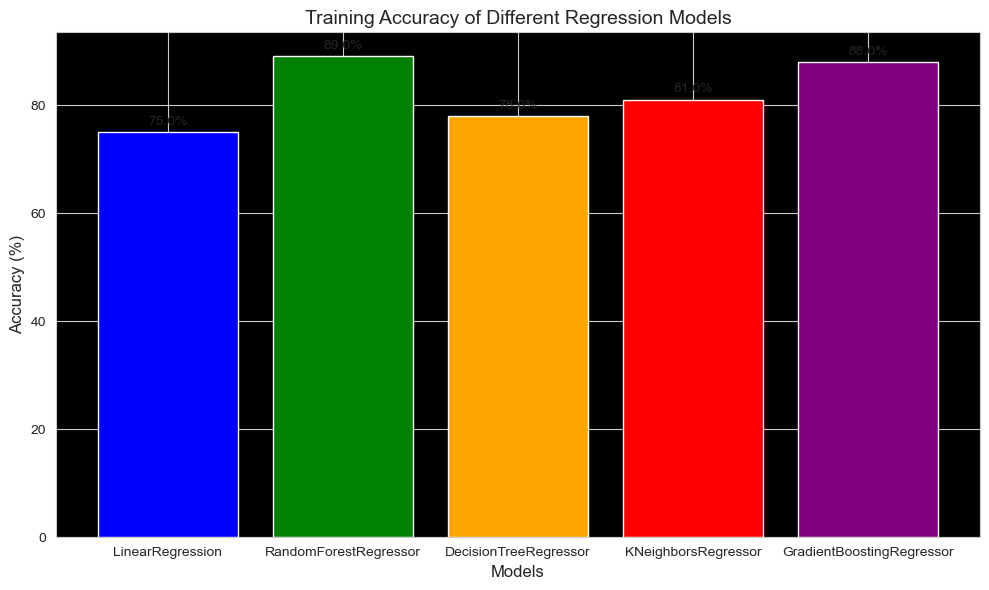

In [49]:
# Define the model names and their corresponding accuracy scores
models = ['LinearRegression', 'RandomForestRegressor',
          'DecisionTreeRegressor','KNeighborsRegressor',
          'GradientBoostingRegressor']
accuracy_scores = [75.0,89.0,78.0,81.0,88.0]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add annotations to display the accuracy on each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3),  # Offset the text a bit
                 textcoords="offset points", 
                 ha='center', va='bottom')

# Add title and labels
plt.title('Training Accuracy of Different Regression Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Conclusion

As we saw accuracy from 

LinearRegression() Has a training score of 75.0 % accuracy score

RandomForestRegressor() Has a training score of 89.0 % accuracy score

DecisionTreeRegressor() Has a training score of 78.0 % accuracy score

KNeighborsRegressor() Has a training score of 81.0 % accuracy score

GradientBoostingRegressor() Has a training score of 88.0 % accuracy score

# So RandomForestRegressor has highest accuracy of 89%

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

In [ ]:
score = regressor.predict(X_test)

In [ ]:
score[0:10]

In [ ]:
test = pd.merge(test, test.groupby('engine',as_index=False)['cycles'].max(), how='left', on='engine')
test.rename(columns={"cycles_x": "cycles", "cycles_y": "maxcycles"}, inplace=True)
test['score'] = score
test.head()